# Tool for calculating coordinates for arcs in path creation in SVG files

When creating a path in an SVG-file, you have to enter a lot of coordinates. As long as the path elements are straight, this is not a problem, but when you use an arc-element in the path, it is difficult to calculate the right coordinates.

This notebook is a tool for calculating these coordinates.

We begin by importing some mathematical python libraries.


In [1]:
"""Importeren van numpy: mathematische python bibliotheek"""
import numpy as np

"""Importeren van matplotlib: mathematische plotting bibliotheek"""
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

plt.rcParams['figure.figsize'] = [10, 10]

The arc can be seen as a 'rounding off' of two crossing straight lines. Therefore we have to define two lines by entering coordinates. We also have to define the radius for the rounding-off.

Make sure that you choose coordinates, so that the lines will cross between the coordinates.


In [2]:
"""coordinate 1 of line 1"""
x0 = 0
y0 = 50

"""coordinate 2 of line 2"""
x1 = 100
y1 = 50

"""coordinate 1 of line 2"""
x2 = 80
y2 = 0

"""coordinate 2 of line 2"""
x3 = 20
y3 = 100

"radius roundingo ff"

r = 20

Let's make a graphic of the lines. It is plotted with the y-axis reverse, just like with SVG files.

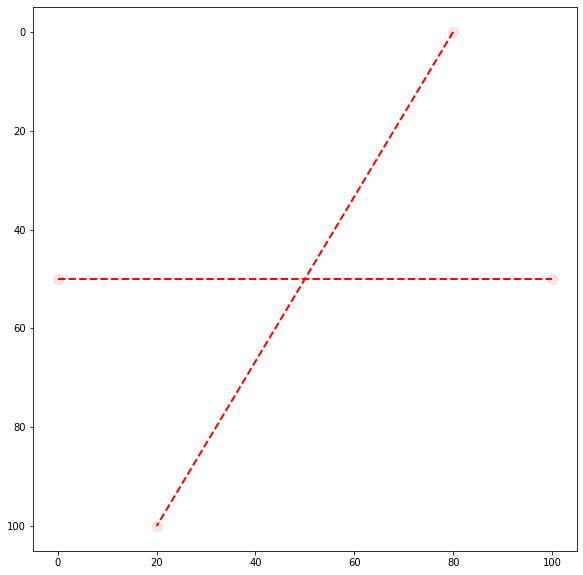

In [3]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=2,
    linestyle='--',
    color='r',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=2,
    linestyle='--',
    color='r',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


Next we need to calculate the coordinates of the intersection of the two lines. First we define a function for this.

In [4]:
def get_intersect(a1, a2, b1, b2):

    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return (x/z, y/z)



Now we can calculate the exact coordinates.

In [5]:
print(get_intersect((x0, y0), (x1, y1), (x2, y2), (x3, y3)))

cross = get_intersect((x0, y0), (x1, y1), (x2, y2), (x3, y3))
crossy = cross[1]
crossx = cross[0]


(50.0, 50.0)


To check whether this is the right intersection, we plot it on the graph.

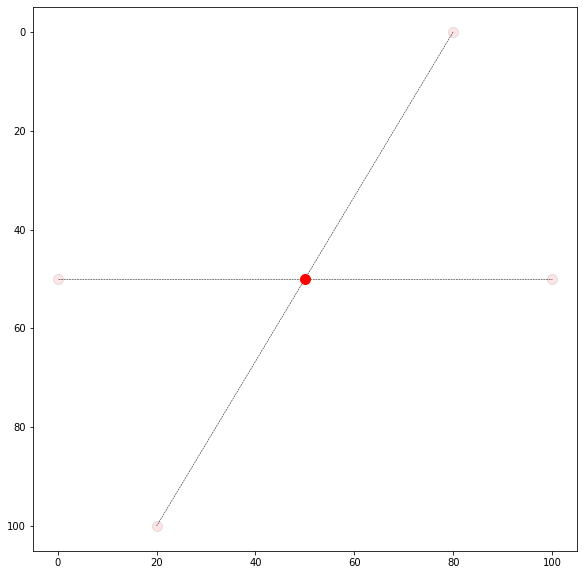

In [6]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.plot(crossx,crossy, marker='o', markersize=10, color="red")
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

To find the center points of the circles for the rounding off, we need to find parallel lines with the distance of the radius separated. 

To do this, first we find the coordinates of the points exactly the radius moved along the lines. We find four points and those are presented in the plot below.

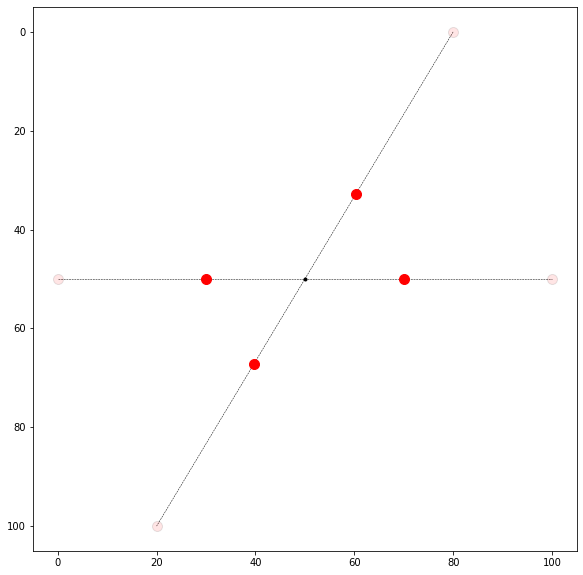

In [7]:
"""calculeer coordinaten afstand van snijpunt"""
d1 = np.sqrt((crossx-x0)**2 + (crossy-y0)**2)
dx0 = ((r*(crossx - x0))/d1)
dy0 = ((r*(crossy - y0))/d1)

d2 = np.sqrt((crossx-x1)**2 + (crossy-y1)**2)
dx1 = ((r*(crossx - x1))/d2)
dy1 = ((r*(crossy - y1))/d2)

d3 = np.sqrt((crossx-x2)**2 + (crossy-y2)**2)
dx2 = ((r*(crossx - x2))/d3)
dy2 = ((r*(crossy - y2))/d3)

d4 = np.sqrt((crossx-x3)**2 + (crossy-y3)**2)
dx3 = ((r*(crossx - x3))/d4)
dy3 = ((r*(crossy - y3))/d4)


x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.gca().set_aspect('equal')
plt.plot(crossx,crossy, marker='o', markersize=3, color="black")
plt.plot(crossx - dx0,crossy - dy0, marker='o', markersize=10, color="red")
plt.plot(crossx - dx1,crossy - dy1, marker='o', markersize=10, color="red")
plt.plot(crossx - dx2,crossy - dy2, marker='o', markersize=10, color="red")
plt.plot(crossx - dx3,crossy - dy3, marker='o', markersize=10, color="red")

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


These four points are a radius-length seperated from the intersect. But we need points from parallel lins at radius-length distance. Therefore we rotate these 4 points by 90 degrees. We plot them in the new plot below.

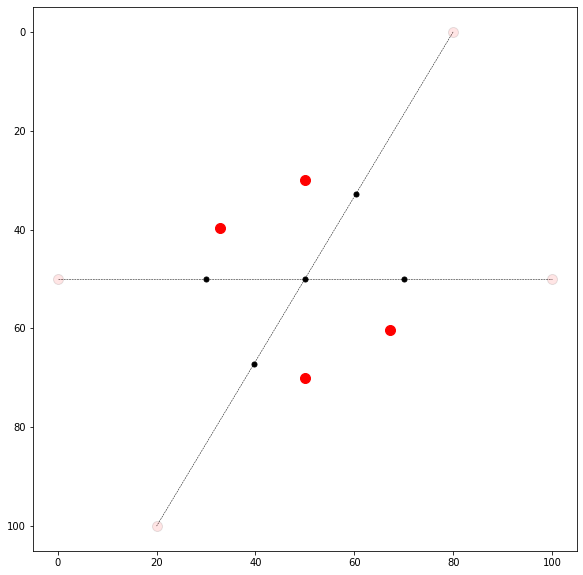

In [8]:
deltax01 = crossx + dy0 
deltay01 = crossy - dx0
deltax02 = crossx - dy0 
deltay02 = crossy + dx0
deltax11 = crossx + dy1 
deltay11 = crossy - dx1
deltax12 = crossx - dy1 
deltay12 = crossy + dx1
deltax21 = crossx + dy2 
deltay21 = crossy - dx2
deltax22 = crossx - dy2 
deltay22 = crossy + dx2
deltax31 = crossx + dy3 
deltay31 = crossy - dx3
deltax32 = crossx - dy3 
deltay32 = crossy + dx3

x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.plot(crossx,crossy, marker='o', markersize=5, color="black")
plt.plot(crossx - dx0,crossy - dy0, marker='o', markersize=5, color="black")
plt.plot(crossx - dx1,crossy - dy1, marker='o', markersize=5, color="black")
plt.plot(crossx - dx2,crossy - dy2, marker='o', markersize=5, color="black")
plt.plot(crossx - dx3,crossy - dy3, marker='o', markersize=5, color="black")
plt.plot(deltax01,deltay01, marker='o', markersize=10, color="red")
plt.plot(deltax11,deltay11, marker='o', markersize=10, color="red")
plt.plot(deltax21,deltay21, marker='o', markersize=10, color="red")
plt.plot(deltax31,deltay31, marker='o', markersize=10, color="red")

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


Because we know now how to calculate the displacement of the intersect to parallel lines on radius-lenght distance, we can now also calculates the coordinates of the displaced original points that defined the orginal crossing lines. These calculated coordinates are shown in the plot below.


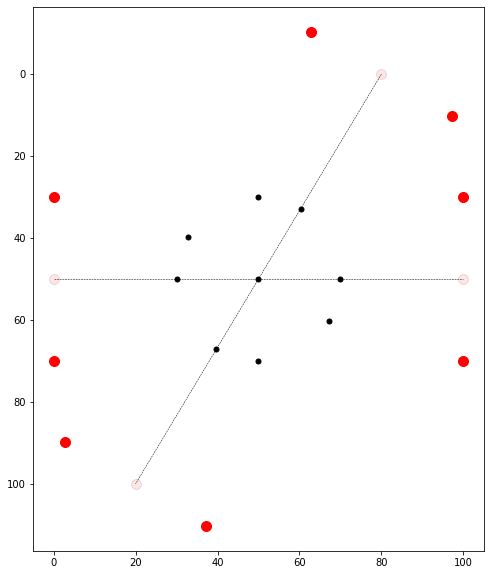

In [9]:
dx01 = x0 + (crossx - deltax01)
dy01 = y0 + (crossy - deltay01)
dx02 = x0 - (crossx - deltax01)
dy02 = y0 - (crossy - deltay01)

dx11 = x1 - (crossx - deltax11)
dy11 = y1 - (crossy - deltay11)
dx12 = x1 + (crossx - deltax11)
dy12 = y1 + (crossy - deltay11)

dx21 = x2 + (crossx - deltax21)
dy21 = y2 + (crossy - deltay21)
dx22 = x2 - (crossx - deltax21)
dy22 = y2 - (crossy - deltay21)

dx31 = x3 - (crossx - deltax31)
dy31 = y3 - (crossy - deltay31)
dx32 = x3 + (crossx - deltax31)
dy32 = y3 + (crossy - deltay31)



x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
plt.plot(crossx,crossy, marker='o', markersize=5, color="black")
plt.plot(crossx - dx0,crossy - dy0, marker='o', markersize=5, color="black")
plt.plot(crossx - dx1,crossy - dy1, marker='o', markersize=5, color="black")
plt.plot(crossx - dx2,crossy - dy2, marker='o', markersize=5, color="black")
plt.plot(crossx - dx3,crossy - dy3, marker='o', markersize=5, color="black")
plt.plot(deltax01,deltay01, marker='o', markersize=5, color="black")
plt.plot(deltax11,deltay11, marker='o', markersize=5, color="black")
plt.plot(deltax21,deltay21, marker='o', markersize=5, color="black")
plt.plot(deltax31,deltay31, marker='o', markersize=5, color="black")
plt.plot(dx01,dy01, marker='o', markersize=10, color="red")
plt.plot(dx02,dy02, marker='o', markersize=10, color="red")
plt.plot(dx11,dy11, marker='o', markersize=10, color="red")
plt.plot(dx12,dy12, marker='o', markersize=10, color="red")
plt.plot(dx21,dy21, marker='o', markersize=10, color="red")
plt.plot(dx22,dy22, marker='o', markersize=10, color="red")
plt.plot(dx31,dy31, marker='o', markersize=10, color="red")
plt.plot(dx32,dy32, marker='o', markersize=10, color="red")
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


With the displaced coordinates of the original coordinates, we can now draw all parallel lines to the original two lines at the distance of the radius. These lines are shown in the plot below.

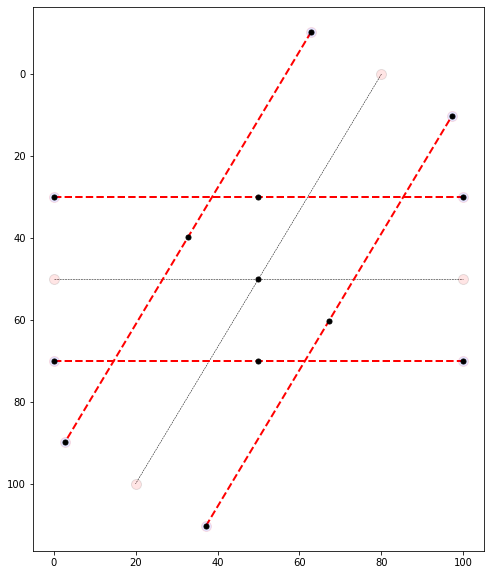

In [10]:


x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=2,
    linestyle='--',
    color='red',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=2,
    linestyle='--',
    color='red',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=2,
    linestyle='--',
    color='red',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=2,
    linestyle='--',
    color='red',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(crossx,crossy, marker='o', markersize=5, color="black")

plt.plot(deltax01,deltay01, marker='o', markersize=5, color="black")
plt.plot(deltax11,deltay11, marker='o', markersize=5, color="black")
plt.plot(deltax21,deltay21, marker='o', markersize=5, color="black")
plt.plot(deltax31,deltay31, marker='o', markersize=5, color="black")
plt.plot(dx01,dy01, marker='o', markersize=5, color="black")
plt.plot(dx02,dy02, marker='o', markersize=5, color="black")
plt.plot(dx11,dy11, marker='o', markersize=5, color="black")
plt.plot(dx12,dy12, marker='o', markersize=5, color="black")
plt.plot(dx21,dy21, marker='o', markersize=5, color="black")
plt.plot(dx22,dy22, marker='o', markersize=5, color="black")
plt.plot(dx31,dy31, marker='o', markersize=5, color="black")
plt.plot(dx32,dy32, marker='o', markersize=5, color="black")

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

With the previously defined function we can also find the 4 intersection of these 4 lines. These 4 intersections are shown in the plot below.

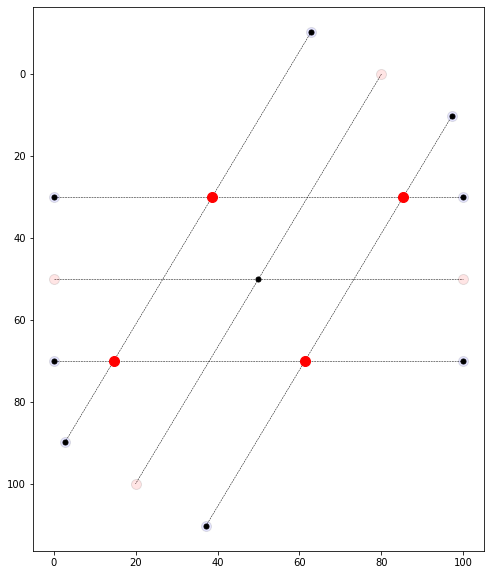

In [11]:
center1 = get_intersect((dx01, dy01), (dx11, dy11), (dx32, dy32), (dx22, dy22))
center2 = get_intersect((dx01, dy01), (dx11, dy11), (dx21, dy21), (dx31, dy31))
center3 = get_intersect((dx22, dy22), (dx32, dy32), (dx02, dy02), (dx12, dy12))
center4 = get_intersect((dx21, dy21), (dx31, dy31), (dx02, dy02), (dx12, dy12))

center1y = center1[1]
center1x = center1[0]
center2y = center2[1]
center2x = center2[0]
center3y = center3[1]
center3x = center3[0]
center4y = center4[1]
center4x = center4[0]

x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(crossx,crossy, marker='o', markersize=5, color="black")
plt.plot(dx01,dy01, marker='o', markersize=5, color="black")
plt.plot(dx02,dy02, marker='o', markersize=5, color="black")
plt.plot(dx11,dy11, marker='o', markersize=5, color="black")
plt.plot(dx12,dy12, marker='o', markersize=5, color="black")
plt.plot(dx21,dy21, marker='o', markersize=5, color="black")
plt.plot(dx22,dy22, marker='o', markersize=5, color="black")
plt.plot(dx31,dy31, marker='o', markersize=5, color="black")
plt.plot(dx32,dy32, marker='o', markersize=5, color="black")
plt.plot(center1x,center1y, marker='o', markersize=10, color="red")
plt.plot(center2x,center2y, marker='o', markersize=10, color="red")
plt.plot(center3x,center3y, marker='o', markersize=10, color="red")
plt.plot(center4x,center4y, marker='o', markersize=10, color="red")

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


These 4 points are the center points for the circles for the rounding off. We can draw the circles with the supplied radius. See the plot below. Notice that all 4 circles touch the original crossing lines.

center1 = get_intersect((dx01, dy01), (dx11, dy11), (dx32, dy32), (dx22, dy22))
center2 = get_intersect((dx01, dy01), (dx11, dy11), (dx21, dy21), (dx31, dy31))
center3 = get_intersect((dx22, dy22), (dx32, dy32), (dx02, dy02), (dx12, dy12))
center4 = get_intersect((dx21, dy21), (dx31, dy31), (dx02, dy02), (dx12, dy12))

center1y = center1[1]
center1x = center1[0]
center2y = center2[1]
center2x = center2[0]
center3y = center3[1]
center3x = center3[0]
center4y = center4[1]
center4x = center4[0]

x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(crossx,crossy, marker='o', markersize=5, color="black")
plt.plot(dx01,dy01, marker='o', markersize=5, color="black")
plt.plot(dx02,dy02, marker='o', markersize=5, color="black")
plt.plot(dx11,dy11, marker='o', markersize=5, color="black")
plt.plot(dx12,dy12, marker='o', markersize=5, color="black")
plt.plot(dx21,dy21, marker='o', markersize=5, color="black")
plt.plot(dx22,dy22, marker='o', markersize=5, color="black")
plt.plot(dx31,dy31, marker='o', markersize=5, color="black")
plt.plot(dx32,dy32, marker='o', markersize=5, color="black")
plt.plot(center1x,center1y, marker='o', markersize=5, color="black")
plt.plot(center2x,center2y, marker='o', markersize=5, color="black")
plt.plot(center3x,center3y, marker='o', markersize=5, color="black")
plt.plot(center4x,center4y, marker='o', markersize=5, color="black")
circle1 = plt.Circle((center1x, center1y), r, color='red', fill=False)
circle2 = plt.Circle((center2x, center2y), r, color='red', fill=False)
circle3 = plt.Circle((center3x, center3y), r, color='red', fill=False)
circle4 = plt.Circle((center4x, center4y), r, color='red', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


With the previously calculated displacements we can determine the tangent points of the circles and the crossing lines. We plot those points in the diagram below.

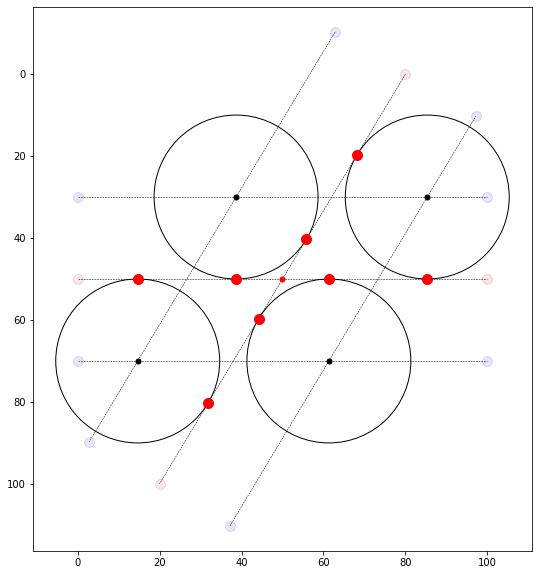

In [12]:
t1center1x = center1x + dy0
t1center1y = center1y + dx1
t2center1x = center1x + dy3
t2center1y = center1y + dx2

t1center2x = center2x + dy0
t1center2y = center2y + dx1
t2center2x = center2x - dy3
t2center2y = center2y - dx2

t1center3x = center3x - dy0
t1center3y = center3y - dx1
t2center3x = center3x + dy3
t2center3y = center3y + dx2

t1center4x = center4x - dy0
t1center4y = center4y - dx1
t2center4x = center4x - dy3
t2center4y = center4y - dx2

x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(crossx,crossy, marker='o', markersize=5, color="red")
plt.plot(center1x,center1y, marker='o', markersize=5, color="black")
plt.plot(center2x,center2y, marker='o', markersize=5, color="black")
plt.plot(center3x,center3y, marker='o', markersize=5, color="black")
plt.plot(center4x,center4y, marker='o', markersize=5, color="black")
plt.plot(t1center1x,t1center1y, marker='o', markersize=10, color="red")
plt.plot(t2center1x,t2center1y, marker='o', markersize=10, color="red")
plt.plot(t1center2x,t1center2y, marker='o', markersize=10, color="red")
plt.plot(t2center2x,t2center2y, marker='o', markersize=10, color="red")
plt.plot(t1center3x,t1center3y, marker='o', markersize=10, color="red")
plt.plot(t2center3x,t2center3y, marker='o', markersize=10, color="red")
plt.plot(t1center4x,t1center4y, marker='o', markersize=10, color="red")
plt.plot(t2center4x,t2center4y, marker='o', markersize=10, color="red")
circle1 = plt.Circle((center1x, center1y), r, color='black', fill=False)
circle2 = plt.Circle((center2x, center2y), r, color='black', fill=False)
circle3 = plt.Circle((center3x, center3y), r, color='black', fill=False)
circle4 = plt.Circle((center4x, center4y), r, color='black', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)

plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()


Notice that these tangent points are exactly the coordinates that are needed when creating rounding off is done with an Arc in a Path in a SVG file. When two lines cross, there are four corners that can be rounded off. That is also the reason why there are four circles. 

We calculate and plot the tangent coordinates of each circle and it's center coordinates separately. 

This is the first circle.

circle center 1: 61.323807579381196 70.0
circle center 1 tangent 1: 61.323807579381196 50.0
circle center 1 tangent 2: 44.173949065130316 59.71008489144947


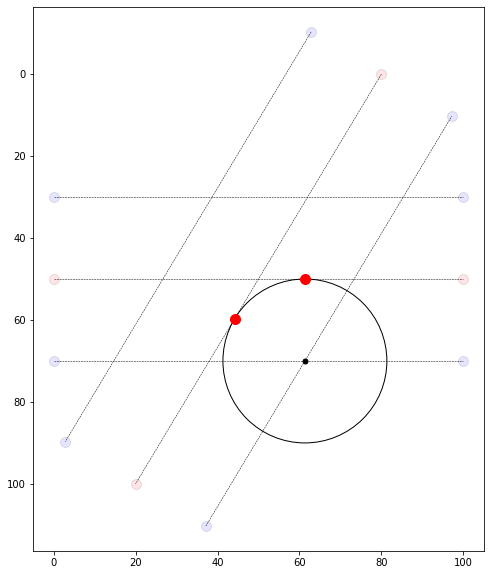

In [13]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(center1x,center1y, marker='o', markersize=5, color="black")
plt.plot(t1center1x,t1center1y, marker='o', markersize=10, color="red")
plt.plot(t2center1x,t2center1y, marker='o', markersize=10, color="red")
circle1 = plt.Circle((center1x, center1y), r, color='black', fill=False)

fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle1)


plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

print("circle center 1:", center1x, center1y)
print("circle center 1 tangent 1:", t1center1x, t1center1y)
print("circle center 1 tangent 2:", t2center1x, t2center1y)



This is the second circle.

circle center 2: 14.676192420618806 70.0
circle center 2 tangent 1: 14.676192420618806 50.0
circle center 2 tangent 2: 31.82605093486969 80.28991510855053


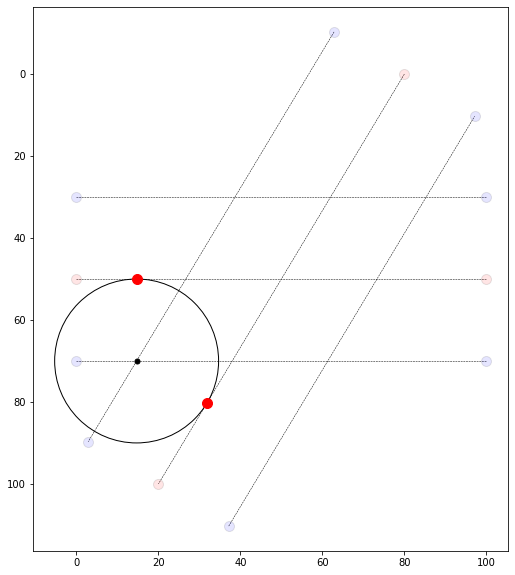

In [14]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(center2x,center2y, marker='o', markersize=5, color="black")
plt.plot(t1center2x,t1center2y, marker='o', markersize=10, color="red")
plt.plot(t2center2x,t2center2y, marker='o', markersize=10, color="red")
circle2 = plt.Circle((center2x, center2y), r, color='black', fill=False)

fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle2)


plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

print("circle center 2:", center2x, center2y)
print("circle center 2 tangent 1:", t1center2x, t1center2y)
print("circle center 2 tangent 2:", t2center2x, t2center2y)

This is the third circle.

circle center 3: 85.3238075793812 30.0
circle center 3 tangent 1: 85.3238075793812 50.0
circle center 3 tangent 2: 68.17394906513032 19.71008489144947


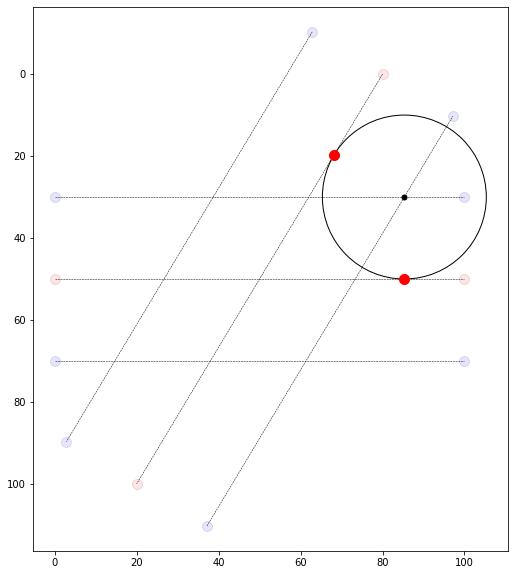

In [15]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(center3x,center3y, marker='o', markersize=5, color="black")
plt.plot(t1center3x,t1center3y, marker='o', markersize=10, color="red")
plt.plot(t2center3x,t2center3y, marker='o', markersize=10, color="red")
circle3 = plt.Circle((center3x, center3y), r, color='black', fill=False)

fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle3)


plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

print("circle center 3:", center3x, center3y)
print("circle center 3 tangent 1:", t1center3x, t1center3y)
print("circle center 3 tangent 2:", t2center3x, t2center3y)

This is the fourth circle.

circle center 4: 38.676192420618804 30.0
circle center 4 tangent 1: 38.676192420618804 50.0
circle center 4 tangent 2: 55.826050934869684 40.28991510855053


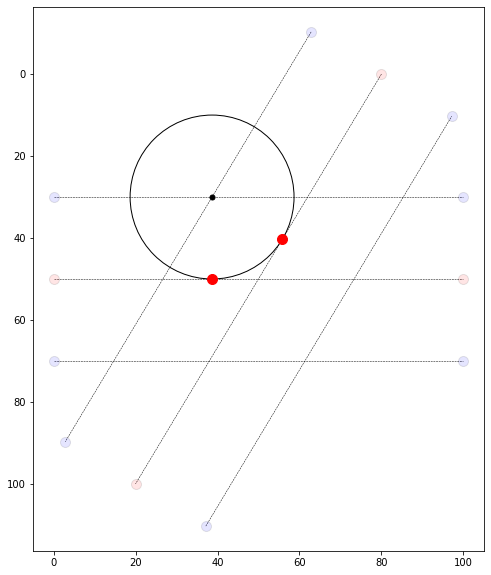

In [16]:
x = (x0,x1)
y = (y0,y1)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (x2,x3)
z = (y2,y3)
plt.plot(x, z,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 0, 0.1))
x = (dx01,dx11)
y = (dy01,dy11)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx02,dx12)
y = (dy02,dy12)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx21,dx31)
y = (dy21,dy31)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))
x = (dx32,dx22)
y = (dy32,dy22)
plt.plot(x, y,
    linewidth=0.5,
    linestyle='--',
    color='black',
    marker='o',
    markersize=10,
    markerfacecolor=(0, 0, 1, 0.1))

plt.plot(center4x,center4y, marker='o', markersize=5, color="black")
plt.plot(t1center4x,t1center4y, marker='o', markersize=10, color="red")
plt.plot(t2center4x,t2center4y, marker='o', markersize=10, color="red")
circle4 = plt.Circle((center4x, center4y), r, color='black', fill=False)

fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle4)


plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()

print("circle center 4:", center4x, center4y)
print("circle center 4 tangent 1:", t1center4x, t1center4y)
print("circle center 4 tangent 2:", t2center4x, t2center4y)

Copy the coordinates of the required rounding off to your SVG file and enjoy.
